In [4]:
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.feature_selection import VarianceThreshold  # 导入python的相关模块
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score as ACCS
import pandas as pd
from sklearn import tree
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score

# open up a datastore
store = pd.HDFStore('train_data.h5')
store1 = pd.HDFStore('test_data.h5')
# Get the feature matrix (samples and their features)
feature_matrix_dataframe = store['rpkm']  # train的数据框架
feature_matrix_dataframe_test = store1['rpkm']  # test的数据框架

all_in = pd.concat([feature_matrix_dataframe, feature_matrix_dataframe_test], axis=0, join='inner')

name = all_in.index.values  # 提取行标签

data = all_in.values  # 提取数据丢掉标签（总和数据）
sel = VarianceThreshold(threshold=15)  # 表示剔除特征的方差大于阈值15的feature
new = sel.fit_transform(data)  # 返回的结果为选择的特征矩阵
new_all = pd.DataFrame(new, index=name)  # 得到只剩下feature的新数据
a = new_all.iloc[:5, 3]
new_train = new_all.iloc[:21389, ]  # 新的train数据
new_test = new_all.iloc[21389:, ]  # 新的test数据

# 注意，新数据的gene序列（columns）被抹掉了，但是这不重要
# 唯一的问题是所有的数据一起提取方差了


# pca = decomposition.PCA(n_components=50)
# new_train_afterPCA = pca.fit_transform(new_train.values)
# new_test_afterPCA = pca.transform(new_test.values)
# # 降维
# new_train_afterPCA_da = pd.DataFrame(new_train_afterPCA, index=new_train.index.values)
# new_test_afterPCA_da = pd.DataFrame(new_test_afterPCA, index=new_test.index.values)



In [35]:
#Visualization
print(new_train.shape)
print(new_train.index[:4])
print(new_train.values[:4, :4])

pca = decomposition.PCA(n_components=100)
new_train_afterPCA = pca.fit_transform(new_train.values)
new_test_afterPCA = pca.transform(new_test.values)
# 降维

print(new_train_afterPCA.shape)
print(new_train_afterPCA[:4, :4])

new_train_afterPCA_da = pd.DataFrame(new_train_afterPCA, index=new_train.index.values)
new_test_afterPCA_da = pd.DataFrame(new_test_afterPCA, index=new_test.index.values)


print(new_train_afterPCA_da.shape)
print(new_train_afterPCA_da.index[:4])
print(new_train_afterPCA_da.values[:4, :4])

# print(new_train_afterPCA_da.shape)
# print(new_train_afterPCA_da.values[:4, :])
# print(new_train_afterPCA[:4, :])

(21389, 4717)
Index(['45719_GSM1112514_SRR805197', '45719_GSM1112529_SRR805212',
       '45719_GSM1112532_SRR805215', '45719_GSM1112537_SRR805220'],
      dtype='object')
[[0.         0.         8.28685414 0.        ]
 [0.         0.         8.07304696 0.        ]
 [0.         0.         1.40453445 0.        ]
 [0.         0.         3.46595404 0.        ]]
(21389, 100)
[[-1644.45010196  -306.65736335  -112.11573025  -759.28890118]
 [-1646.5551556   -309.06298546  -101.26363787 -1065.46731008]
 [-1643.3106197   -311.13903828  -124.5618827   -338.14525042]
 [-1639.34822554  -310.02828285  -128.49289264  -178.06815714]]
(21389, 100)
Index(['45719_GSM1112514_SRR805197', '45719_GSM1112529_SRR805212',
       '45719_GSM1112532_SRR805215', '45719_GSM1112537_SRR805220'],
      dtype='object')
[[-1644.45010196  -306.65736335  -112.11573025  -759.28890118]
 [-1646.5551556   -309.06298546  -101.26363787 -1065.46731008]
 [-1643.3106197   -311.13903828  -124.5618827   -338.14525042]
 [-1639.3482255

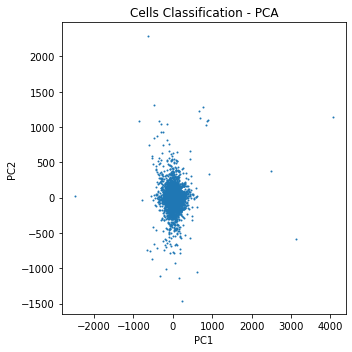

In [38]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax.scatter(new_train_afterPCA_da.values[:,-2], new_train_afterPCA_da.values[:,-1], s=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cells Classification - PCA')

fig.tight_layout()